<a href="https://colab.research.google.com/github/vpagonis/FSF-paper/blob/main/notebooks/mycolab-github-demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solution of the OTOR model



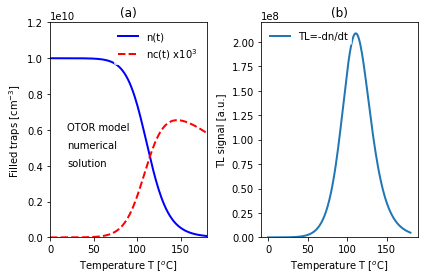

In [6]:
# Solution of ODE's for the OTOR model using solver odeint
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Initial conditions.
n0, nc0 ,m0 = 1e10, 0, 1e10
# Initial conditions vector
y0 = n0, nc0, m0
# Numerical parameters for OTOR.
N,    An,    Am,    s,   E , hr = \
1e10, 1e-8, 1e-8,  1e12, 1 , 1
# A grid of time points in seconds
t = np.linspace(0, 180, 180)
kB=8.617e-5
# differential equations of the OTOR model.
def deriv(y, t):
    n, nc, m = y
    dndt = - n*s*np.exp(-E/(kB*(273+hr*t)))+ nc*An*(N-n)
    dncdt =  n*s*np.exp(-E/(kB*(273+hr*t)))- nc*An*(N-n)-m*Am*nc
    dmdt = -m*Am*nc
    return dndt, dncdt, dmdt
# Integrate the OTOR equations over the time grid, t.
# Call `odeint` to generate the solution.  
ret = odeint(deriv, y0, t)
n, nc, m = ret.T
# Plot the data 
plt.subplot(1,2, 1)
plt.plot(hr*t, n, 'b',  linewidth=2, label='n(t)')
plt.plot(hr*t,nc*1000,'r--',linewidth=2,label='nc(t) x10$^{3}$')
leg = plt.legend()
leg.get_frame().set_linewidth(0.0)
plt.ylabel('Filled traps [cm$^{-3}$]')
plt.ylim(0,1.2e10)
plt.xlim(0,180)
plt.title('(a)')
plt.text(20,.6e10,'OTOR model')
plt.text(20,.5e10,'numerical')
plt.text(20,.4e10,'solution')
plt.xlabel(r'Temperature T [$^{o}$C]')
plt.subplot(1,2, 2)
TL= n*s*np.exp(-E/(kB*(273+hr*t)))- nc*An*(N-n)
plt.plot(hr*t,TL,linewidth=2,label='TL=-dn/dt')
plt.ylim(0,2.2e8)
leg = plt.legend()
leg.get_frame().set_linewidth(0.0)
plt.ylabel('TL signal [a.u.]')
plt.xlabel(r'Temperature T [$^{o}$C]')
plt.title('(b)')
plt.tight_layout()
plt.show()